# Investigate Thermal Effects on Coin Geometry

Compare with Figure 7a in Ecker paper using piecewise diffusivity functions

In [1]:
%pip install pybamm -q    # install PyBaMM if it is not installed
import pybamm
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir(pybamm.__path__[0]+'/..')

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
Note: you may need to restart the kernel to use updated packages.


Import Ecker data

In [2]:
chemistry = pybamm.parameter_sets.Ecker2015_v2
var = pybamm.standard_spatial_vars
coin = {"particle shape":"negative coin"}

Model 1, DFN coin

In [3]:
# choose DFN
model1 = pybamm.lithium_ion. DFN(build=False, options=coin)
# add rho_n
model1.variables.update(
    {
        "rho_n": var.rho_n,
        "rho_n [m]": var.rho_n * model1.param.R_n,
    }
)
# delete r_n
model1.variables.pop('r_n', None)
model1.variables.pop('r_n [m]', None)
model1.build_model()

Model 2, SPMe coin

In [4]:
# choose SPMe
model2 = pybamm.lithium_ion. SPMe(build=False, options=coin)
# add rho_n
model2.variables.update(
    {
        "rho_n": var.rho_n,
        "rho_n [m]": var.rho_n * model2.param.R_n,
    }
)
# delete r_n
model2.variables.pop('r_n', None)
model2.variables.pop('r_n [m]', None)
model2.build_model()

Model 3, DFN spherical

Model 4, SPMe spherical

In [5]:
# choose DFN
model3 = pybamm.lithium_ion.DFN()
# choose SPMe
model4 = pybamm.lithium_ion.SPMe()

## Varying Temperature at Constant C rate (1C, 5C)

Parameter set 1, 25 degree C (298.15K), coin

In [6]:
# pick parameters, keeping C-rate as an input to be changed for each solve
parameter_values1 = pybamm.ParameterValues(chemistry=chemistry)
parameter_values1.update({"Current function [A]": "[input]"})
parameter_values1.update({"Negative particle radius [m]": 2.1e-05})
parameter_values1.update({"Negative electrode diffusivity [m2.s-1]": "[function]graphite_diffusivity_Ecker2015_coin"},
                        path="pybamm/input/parameters/lithium-ion/anodes/" + chemistry['anode'])
parameter_values1.update({"Ambient temperature [K]": 298.15})
parameter_values1.update({"Initial temperature [K]": 298.15})

Parameter set 2, 40 degree C (313.15K), coin

In [7]:
parameter_values2 = pybamm.ParameterValues(chemistry=chemistry)
parameter_values2.update({"Current function [A]": "[input]"})
parameter_values2.update({"Negative particle radius [m]": 2.1e-05})
parameter_values2.update({"Negative electrode diffusivity [m2.s-1]": "[function]graphite_diffusivity_Ecker2015_coin"},
                        path="pybamm/input/parameters/lithium-ion/anodes/" + chemistry['anode'])
parameter_values2.update({"Ambient temperature [K]": 313.15})
parameter_values2.update({"Initial temperature [K]": 313.15})

Parameter set 3, 0 degree C (273.15K), coin

In [8]:
parameter_values3 = pybamm.ParameterValues(chemistry=chemistry)
parameter_values3.update({"Current function [A]": "[input]"})
parameter_values3.update({"Negative particle radius [m]": 2.1e-05})
parameter_values3.update({"Negative electrode diffusivity [m2.s-1]": "[function]graphite_diffusivity_Ecker2015_coin"},
                        path="pybamm/input/parameters/lithium-ion/anodes/" + chemistry['anode'])
parameter_values3.update({"Ambient temperature [K]": 273.15})
parameter_values3.update({"Initial temperature [K]": 273.15})

Parameter set 4, -10 degree C (263.15K), coin

In [9]:
parameter_values4 = pybamm.ParameterValues(chemistry=chemistry)
parameter_values4.update({"Current function [A]": "[input]"})
parameter_values4.update({"Negative particle radius [m]": 2.1e-05})
parameter_values4.update({"Negative electrode diffusivity [m2.s-1]": "[function]graphite_diffusivity_Ecker2015_coin"},
                        path="pybamm/input/parameters/lithium-ion/anodes/" + chemistry['anode'])
parameter_values4.update({"Ambient temperature [K]": 263.15})
parameter_values4.update({"Initial temperature [K]": 263.15})

Parameter set 5, 25 degree C (298.15K), spherical

In [10]:
parameter_values5 = pybamm.ParameterValues(chemistry=chemistry)
parameter_values5.update({"Current function [A]": "[input]"})
parameter_values5.update({"Ambient temperature [K]": 298.15})
parameter_values5.update({"Initial temperature [K]": 298.15})

Parameter set 6, 40 degree C (313.15K), spherical

In [11]:
parameter_values6 = pybamm.ParameterValues(chemistry=chemistry)
parameter_values6.update({"Current function [A]": "[input]"})
parameter_values6.update({"Ambient temperature [K]": 313.15})
parameter_values6.update({"Initial temperature [K]": 313.15})

Parameter set 7, 0 degree C (273.15K), spherical

In [12]:
parameter_values7 = pybamm.ParameterValues(chemistry=chemistry)
parameter_values7.update({"Current function [A]": "[input]"})
parameter_values7.update({"Ambient temperature [K]": 273.15})
parameter_values7.update({"Initial temperature [K]": 273.15})

Parameter set 8, -10 degree C (263.15K), spherical

In [13]:
parameter_values8 = pybamm.ParameterValues(chemistry=chemistry)
parameter_values8.update({"Current function [A]": "[input]"})
parameter_values8.update({"Ambient temperature [K]": 263.15})
parameter_values8.update({"Initial temperature [K]": 263.15})

In [14]:
# coin
var_pts1 = {
    var.x_n: int(parameter_values1.evaluate(model2.param.L_n / 1e-6)),
    var.x_s: int(parameter_values1.evaluate(model2.param.L_s / 1e-6)),
    var.x_p: int(parameter_values1.evaluate(model2.param.L_p / 1e-6)),
    var.rho_n: int(parameter_values1.evaluate(model2.param.R_n / 1e-7)),
    var.r_p: int(parameter_values1.evaluate(model2.param.R_p / 1e-7)),
}
var_pts2 = {
    var.x_n: int(parameter_values2.evaluate(model2.param.L_n / 1e-6)),
    var.x_s: int(parameter_values2.evaluate(model2.param.L_s / 1e-6)),
    var.x_p: int(parameter_values2.evaluate(model2.param.L_p / 1e-6)),
    var.rho_n: int(parameter_values2.evaluate(model2.param.R_n / 1e-7)),
    var.r_p: int(parameter_values2.evaluate(model2.param.R_p / 1e-7)),
}
var_pts3 = {
    var.x_n: int(parameter_values3.evaluate(model2.param.L_n / 1e-6)),
    var.x_s: int(parameter_values3.evaluate(model2.param.L_s / 1e-6)),
    var.x_p: int(parameter_values3.evaluate(model2.param.L_p / 1e-6)),
    var.rho_n: int(parameter_values3.evaluate(model2.param.R_n / 1e-7)),
    var.r_p: int(parameter_values3.evaluate(model2.param.R_p / 1e-7)),
}
var_pts4 = {
    var.x_n: int(parameter_values4.evaluate(model2.param.L_n / 1e-6)),
    var.x_s: int(parameter_values4.evaluate(model2.param.L_s / 1e-6)),
    var.x_p: int(parameter_values4.evaluate(model2.param.L_p / 1e-6)),
    var.rho_n: int(parameter_values4.evaluate(model2.param.R_n / 1e-7)),
    var.r_p: int(parameter_values4.evaluate(model2.param.R_p / 1e-7)),
}

In [15]:
# spherical
var_pts5 = {
    var.x_n: int(parameter_values5.evaluate(model4.param.L_n / 1e-6)),
    var.x_s: int(parameter_values5.evaluate(model4.param.L_s / 1e-6)),
    var.x_p: int(parameter_values5.evaluate(model4.param.L_p / 1e-6)),
    var.r_n: int(parameter_values5.evaluate(model4.param.R_n / 1e-7)),
    var.r_p: int(parameter_values5.evaluate(model4.param.R_p / 1e-7)),
}
var_pts6 = {
    var.x_n: int(parameter_values6.evaluate(model4.param.L_n / 1e-6)),
    var.x_s: int(parameter_values6.evaluate(model4.param.L_s / 1e-6)),
    var.x_p: int(parameter_values6.evaluate(model4.param.L_p / 1e-6)),
    var.r_n: int(parameter_values6.evaluate(model4.param.R_n / 1e-7)),
    var.r_p: int(parameter_values6.evaluate(model4.param.R_p / 1e-7)),
}
var_pts7 = {
    var.x_n: int(parameter_values7.evaluate(model4.param.L_n / 1e-6)),
    var.x_s: int(parameter_values7.evaluate(model4.param.L_s / 1e-6)),
    var.x_p: int(parameter_values7.evaluate(model4.param.L_p / 1e-6)),
    var.r_n: int(parameter_values7.evaluate(model4.param.R_n / 1e-7)),
    var.r_p: int(parameter_values7.evaluate(model4.param.R_p / 1e-7)),
}
var_pts8 = {
    var.x_n: int(parameter_values8.evaluate(model4.param.L_n / 1e-6)),
    var.x_s: int(parameter_values8.evaluate(model4.param.L_s / 1e-6)),
    var.x_p: int(parameter_values8.evaluate(model4.param.L_p / 1e-6)),
    var.r_n: int(parameter_values8.evaluate(model4.param.R_n / 1e-7)),
    var.r_p: int(parameter_values8.evaluate(model4.param.R_p / 1e-7)),
}

In [16]:
# coin
sim1 =  pybamm.Simulation(model2, parameter_values=parameter_values1, var_pts=var_pts1, geometry=pybamm.battery_geometry(coin_geometry=True))
sim2 =  pybamm.Simulation(model2, parameter_values=parameter_values2, var_pts=var_pts2, geometry=pybamm.battery_geometry(coin_geometry=True))
sim3 =  pybamm.Simulation(model2, parameter_values=parameter_values3, var_pts=var_pts3, geometry=pybamm.battery_geometry(coin_geometry=True))
sim4 =  pybamm.Simulation(model2, parameter_values=parameter_values4, var_pts=var_pts4, geometry=pybamm.battery_geometry(coin_geometry=True))

In [17]:
# spherical
sim5 =  pybamm.Simulation(model4, parameter_values=parameter_values5, var_pts=var_pts5)
sim6 =  pybamm.Simulation(model4, parameter_values=parameter_values6, var_pts=var_pts6)
sim7 =  pybamm.Simulation(model4, parameter_values=parameter_values7, var_pts=var_pts7)
sim8 =  pybamm.Simulation(model4, parameter_values=parameter_values8, var_pts=var_pts8)

In [18]:
C_rates = [1, 5]  # C-rates to solve for
capacity = parameter_values1["Cell capacity [A.h]"]
t_evals = [
    np.linspace(0, 3800, 100), 
    np.linspace(0, 720, 100)
] # times to return the solution at
solutions1 = [None] * len(C_rates)  # empty list that will hold solutions

# loop over C-rates
for i, C_rate in enumerate(C_rates):
    current = C_rate * capacity
    sim1.solve(t_eval=t_evals[i], solver=pybamm.CasadiSolver(mode="fast"),inputs={"Current function [A]": current})
    solutions1[i] = sim1.solution

In [19]:
C_rates = [1, 5]  # C-rates to solve for
capacity = parameter_values2["Cell capacity [A.h]"]
t_evals = [
    np.linspace(0, 3800, 100), 
    np.linspace(0, 720, 100)
] # times to return the solution at
solutions2 = [None] * len(C_rates)  # empty list that will hold solutions

# loop over C-rates
for i, C_rate in enumerate(C_rates):
    current = C_rate * capacity
    sim2.solve(t_eval=t_evals[i], solver=pybamm.CasadiSolver(mode="fast"),inputs={"Current function [A]": current})
    solutions2[i] = sim2.solution

In [20]:
C_rates = [1, 5]  # C-rates to solve for
capacity = parameter_values3["Cell capacity [A.h]"]
t_evals = [
    np.linspace(0, 3800, 100), 
    np.linspace(0, 720, 100)
] # times to return the solution at
solutions3 = [None] * len(C_rates)  # empty list that will hold solutions

# loop over C-rates
for i, C_rate in enumerate(C_rates):
    current = C_rate * capacity
    sim3.solve(t_eval=t_evals[i], solver=pybamm.CasadiSolver(mode="fast"),inputs={"Current function [A]": current})
    solutions3[i] = sim3.solution

In [21]:
C_rates = [1, 5]  # C-rates to solve for
capacity = parameter_values4["Cell capacity [A.h]"]
t_evals = [
    np.linspace(0, 5000, 500), 
    np.linspace(0, 720, 100)
] # times to return the solution at
solutions4 = [None] * len(C_rates)  # empty list that will hold solutions

# loop over C-rates
for i, C_rate in enumerate(C_rates):
    current = C_rate * capacity
    sim4.solve(t_eval=t_evals[i], solver=pybamm.CasadiSolver(mode="fast"),inputs={"Current function [A]": current})
    solutions4[i] = sim4.solution

In [22]:
C_rates = [1, 5]  # C-rates to solve for
capacity = parameter_values5["Cell capacity [A.h]"]
t_evals = [
    np.linspace(0, 3800, 100), 
    np.linspace(0, 720, 100)
] # times to return the solution at
solutions5 = [None] * len(C_rates)  # empty list that will hold solutions

# loop over C-rates
for i, C_rate in enumerate(C_rates):
    current = C_rate * capacity
    sim5.solve(t_eval=t_evals[i], solver=pybamm.CasadiSolver(mode="fast"),inputs={"Current function [A]": current})
    solutions5[i] = sim5.solution

In [23]:
C_rates = [1, 5]  # C-rates to solve for
capacity = parameter_values6["Cell capacity [A.h]"]
t_evals = [
    np.linspace(0, 3800, 100), 
    np.linspace(0, 720, 100)
] # times to return the solution at
solutions6 = [None] * len(C_rates)  # empty list that will hold solutions

# loop over C-rates
for i, C_rate in enumerate(C_rates):
    current = C_rate * capacity
    sim6.solve(t_eval=t_evals[i], solver=pybamm.CasadiSolver(mode="fast"),inputs={"Current function [A]": current})
    solutions6[i] = sim6.solution

In [24]:
C_rates = [1, 5]  # C-rates to solve for
capacity = parameter_values7["Cell capacity [A.h]"]
t_evals = [
    np.linspace(0, 3800, 100), 
    np.linspace(0, 720, 100)
] # times to return the solution at
solutions7 = [None] * len(C_rates)  # empty list that will hold solutions

# loop over C-rates
for i, C_rate in enumerate(C_rates):
    current = C_rate * capacity
    sim7.solve(t_eval=t_evals[i], solver=pybamm.CasadiSolver(mode="fast"),inputs={"Current function [A]": current})
    solutions7[i] = sim7.solution

In [25]:
C_rates = [1, 5]  # C-rates to solve for
capacity = parameter_values8["Cell capacity [A.h]"]
t_evals = [
    np.linspace(0, 5000, 500), 
    np.linspace(0, 720, 100)
] # times to return the solution at
solutions8 = [None] * len(C_rates)  # empty list that will hold solutions

# loop over C-rates
for i, C_rate in enumerate(C_rates):
    current = C_rate * capacity
    sim8.solve(t_eval=t_evals[i], solver=pybamm.CasadiSolver(mode="fast"),inputs={"Current function [A]": current})
    solutions8[i] = sim8.solution

2020-08-21 12:52:22,907 - [WARNING] processed_variable.__call__(510): Calling variable outside interpolation range (returns 'nan')
2020-08-21 12:52:22,910 - [WARNING] processed_variable.__call__(510): Calling variable outside interpolation range (returns 'nan')


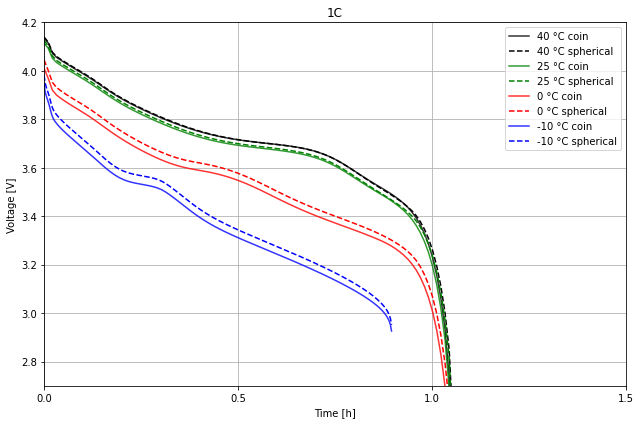

In [31]:
plt.figure(figsize=[9,6])
ax = plt.gca()
# plot the 1C results
t_sol1 = solutions1[0]["Time [s]"].entries
t_sol2 = solutions2[0]["Time [s]"].entries
t_sol3 = solutions3[0]["Time [s]"].entries
t_sol4 = solutions4[0]["Time [s]"].entries
t_sol5 = solutions5[0]["Time [s]"].entries
t_sol6 = solutions6[0]["Time [s]"].entries
t_sol7 = solutions7[0]["Time [s]"].entries
t_sol8 = solutions8[0]["Time [s]"].entries
ax.plot(t_sol2/3600, solutions2[0]["Terminal voltage [V]"](t_sol2), label="40 °C coin", color="black", alpha=0.8)
ax.plot(t_sol6/3600, solutions6[0]["Terminal voltage [V]"](t_sol6), label="40 °C spherical", color="black", linestyle='--')
ax.plot(t_sol1/3600, solutions1[0]["Terminal voltage [V]"](t_sol1), label="25 °C coin", color="green", alpha=0.8)
ax.plot(t_sol5/3600, solutions5[0]["Terminal voltage [V]"](t_sol5), label="25 °C spherical", color="green", linestyle='--')
ax.plot(t_sol3/3600, solutions3[0]["Terminal voltage [V]"](t_sol3), label="0 °C coin", color="red", alpha=0.8)
ax.plot(t_sol7/3600, solutions7[0]["Terminal voltage [V]"](t_sol7), label="0 °C spherical", color="red", linestyle='--')
ax.plot(t_sol4/3600, solutions4[0]["Terminal voltage [V]"](t_sol4), label="-10 °C coin", color="blue", alpha=0.8)
ax.plot(t_sol8/3600, solutions8[0]["Terminal voltage [V]"](t_sol8), label="-10 °C spherical", color="blue", linestyle='--')
ax.set_xlabel("Time [h]")
ax.set_ylabel("Voltage [V]")
ax.set_title("1C")
ax.legend(loc="best")
ax.grid()

plt.xticks(np.arange(0,2,0.5))
plt.yticks(np.arange(2.6,4.4,0.2))
plt.xlim(0,1.5)
plt.ylim(2.7,4.2)
plt.tight_layout()
#plt.savefig('changing temperature at 1C')
plt.show()

## Varying C rate at Constant Low temperature (-10 °C)

In [27]:
sim9 =  pybamm.Simulation(model2, parameter_values=parameter_values4, var_pts=var_pts4, geometry=pybamm.battery_geometry(coin_geometry=True))
sim10 =  pybamm.Simulation(model4, parameter_values=parameter_values8, var_pts=var_pts8)

In [28]:
C_rates = [0.25, 0.5, 1.3]  # C-rates to solve for
capacity = parameter_values4["Cell capacity [A.h]"]
t_evals = [np.linspace(0, 36000, 5000),
          np.linspace(0, 12000, 5000),
          np.linspace(0, 12000, 5000)] # times to return the solution at
solutions9 = [None] * len(C_rates)  # empty list that will hold solutions
current9 = np.array([])

# loop over C-rates
for i, C_rate in enumerate(C_rates):
    current = C_rate * capacity
    sim9.solve(t_eval=t_evals[i], solver=pybamm.CasadiSolver(mode="fast"),inputs={"Current function [A]": current})
    solutions9[i] = sim9.solution
    current9 = np.append(current9, current)

In [29]:
C_rates = [0.25, 0.5, 1.3]  # C-rates to solve for
capacity = parameter_values8["Cell capacity [A.h]"]
t_evals = [np.linspace(0, 36000, 5000),
          np.linspace(0, 12000, 5000),
          np.linspace(0, 12000, 5000)] # times to return the solution at
solutions10 = [None] * len(C_rates)  # empty list that will hold solutions
current10 = np.array([])

# loop over C-rates
for i, C_rate in enumerate(C_rates):
    current = C_rate * capacity
    sim10.solve(t_eval=t_evals[i], solver=pybamm.CasadiSolver(mode="fast"),inputs={"Current function [A]": current})
    solutions10[i] = sim10.solution
    current10 = np.append(current10, current)

2020-08-21 12:53:02,729 - [WARNING] processed_variable.__call__(510): Calling variable outside interpolation range (returns 'nan')
2020-08-21 12:53:02,734 - [WARNING] processed_variable.__call__(510): Calling variable outside interpolation range (returns 'nan')
2020-08-21 12:53:02,738 - [WARNING] processed_variable.__call__(510): Calling variable outside interpolation range (returns 'nan')
2020-08-21 12:53:02,743 - [WARNING] processed_variable.__call__(510): Calling variable outside interpolation range (returns 'nan')
2020-08-21 12:53:02,748 - [WARNING] processed_variable.__call__(510): Calling variable outside interpolation range (returns 'nan')
2020-08-21 12:53:02,753 - [WARNING] processed_variable.__call__(510): Calling variable outside interpolation range (returns 'nan')


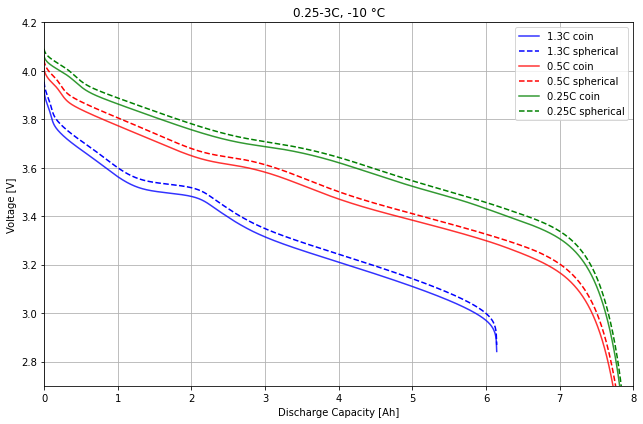

In [32]:
plt.figure(figsize=[9,6])
ax = plt.gca()
# plot the 1C results
t_sol1c = solutions9[0]["Time [s]"].entries
t_sol1s = solutions10[0]["Time [s]"].entries
t_sol2c = solutions9[1]["Time [s]"].entries
t_sol2s = solutions10[1]["Time [s]"].entries
t_sol3c = solutions9[2]["Time [s]"].entries
t_sol3s = solutions10[2]["Time [s]"].entries
ax.plot((current9[2] * t_sol3c * 48)/3600, solutions9[2]["Terminal voltage [V]"](t_sol3c), label="1.3C coin", color="blue", alpha=0.8)
ax.plot((current10[2] * t_sol3s * 48)/3600, solutions10[2]["Terminal voltage [V]"](t_sol3s), label="1.3C spherical", color="blue", linestyle='--')
ax.plot((current9[1] * t_sol2c * 48)/3600, solutions9[1]["Terminal voltage [V]"](t_sol2c), label="0.5C coin", color="red", alpha=0.8)
ax.plot((current10[1] * t_sol2s * 48)/3600, solutions10[1]["Terminal voltage [V]"](t_sol2s), label="0.5C spherical", color="red", linestyle='--')
ax.plot((current9[0] * t_sol1c * 48)/3600, solutions9[0]["Terminal voltage [V]"](t_sol1c), label="0.25C coin", color="green", alpha=0.8)
ax.plot((current10[0] * t_sol1s * 48)/3600, solutions10[0]["Terminal voltage [V]"](t_sol1s), label="0.25C spherical", color="green", linestyle='--')
ax.set_xlabel("Discharge Capacity [Ah]")
ax.set_ylabel("Voltage [V]")
ax.set_title("0.25-3C, -10 °C")
ax.legend(loc="best")
ax.grid()

plt.tight_layout()
plt.xlim(0,8)
plt.ylim(2.7,4.2)
#plt.savefig('changing C rate at -10 degrees')
plt.show()